In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
FILE_NAME = 'data.csv'

In [4]:
df = pd.read_csv(FILE_NAME)
df

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


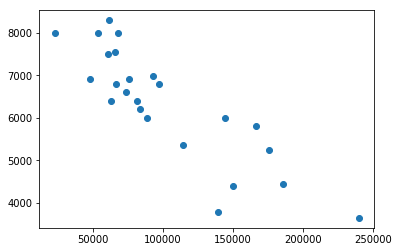

In [16]:
plt.scatter(X, y)
plt.set_xlabel()
plt.show();

In [20]:
X = df['km']
y = df['price']

0     240000
1     139800
2     150500
3     185530
4     176000
5     114800
6     166800
7      89000
8     144500
9      84000
10     82029
11     63060
12     74000
13     97500
14     67000
15     76025
16     48235
17     93000
18     60949
19     65674
20     54000
21     68500
22     22899
23     61789
Name: km, dtype: int64

In [25]:
print(np.sum((predict(X, teta) - y) * X))

-13989660610


In [35]:
teta = np.zeros(2)
print(teta.copy())

[0. 0.]


In [6]:
def predict(X, teta):
    return teta[0] + teta[1] * X * np.sum()

In [34]:
print(0.1 * (1 / len(X)) * np.sum(predict(X, teta) - y))


-633.1833333333333


In [14]:
def MSE(X, Y, f, teta):
    distance = 0
    for xi, yi in zip(X, Y):
        distance += (yi - f(xi, teta)) ** 2
    return distance

In [15]:
print(MSE(X, y, predict, teta))

1002264926


In [65]:
def learn(X, y, teta, epochs=500, learning_rate=0.1):
    m = len(X)
    learning_data = []
    for _ in range(epochs):
        tmp_teta = np.zeros(2)
        tmp_teta[0] = learning_rate * (1 / m) * np.sum(predict(X, teta) - y)
        tmp_teta[1] = learning_rate * (1 / m) * np.sum((predict(X, teta) - y) * X)
        teta = teta - tmp_teta
        errors = MSE(X, y, predict, teta)
        learning_data.append([_, teta, errors])
    return teta, learning_data


In [70]:
new_teta, learning_data = learn(X, y, teta, epochs=15)

In [71]:
print(learning_data)

[[0, array([6.33183333e+02, 5.82902525e+07]), 1.0497717565703209e+27], [1, array([-5.89117722e+11, -7.50391154e+16]), 1.7397162581616292e+45], [2, array([7.58392199e+20, 9.66005223e+25]), 2.883114962818262e+63], [3, array([-9.76305253e+29, -1.24357288e+35]), 4.777992876614414e+81], [4, array([1.25683248e+39, 1.60089561e+44]), 7.918246834896374e+99], [5, array([-1.61796515e+48, -2.06088985e+53]), 1.312237890626019e+118], [6, array([2.08286409e+57, 2.65305681e+62]), 2.1746837620744116e+136], [7, array([-2.68134503e+66, -3.41537440e+71]), 3.6039574065141247e+154], [8, array([3.45179083e+75, 4.39673295e+80]), 5.9725966664589396e+172], [9, array([-4.44361311e+84, -5.66007072e+89]), 9.897983498839287e+190], [10, array([5.72042122e+93, 7.28641036e+98]), 1.640326357436418e+209], [11, array([-7.36410170e+102, -9.38005522e+107]), 2.718402752657806e+227], [12, array([9.48007005e+111, 1.20752787e+117]), 4.505026388289307e+245], [13, array([-1.22040314e+121, -1.55449358e+126]), 7.465877798769933e+2

In [72]:
print()

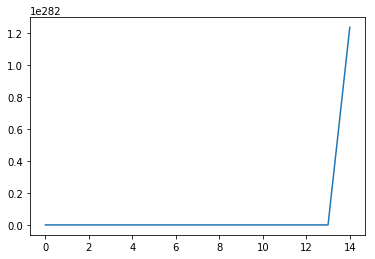

In [73]:
indexes = list(l[0] for l in learning_data)
errors = list(l[2] for l in learning_data)
plt.plot(indexes, errors)